In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('../titanic/train.csv')


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

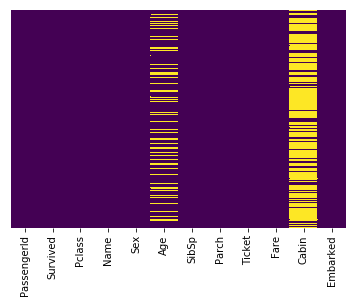

In [6]:
#this shows where the missing data is shown. yellow is True that it's null
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
sns.set_style('whitegrid')

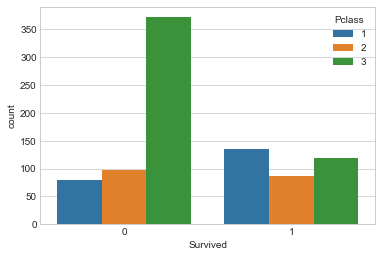

In [8]:
sns.countplot(x='Survived', hue = 'Pclass', data=train)

C:\Users\toyao_000\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


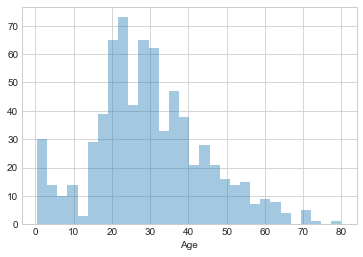

In [9]:
#taking a look at the age distribution on board
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

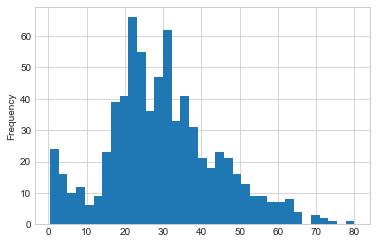

In [10]:
#doing it using pandas visualization
train['Age'].plot.hist(bins=35)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


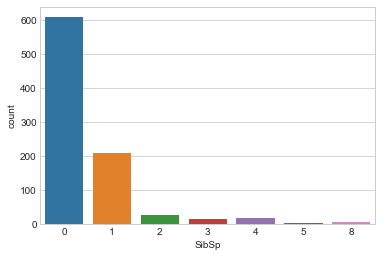

In [12]:
sns.countplot(x='SibSp',data=train)
#looks like most people on board did not have children or a spouse on board

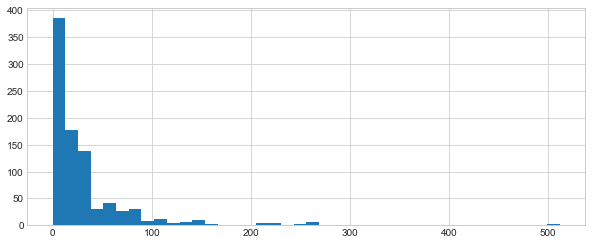

In [13]:
train['Fare'].hist(bins=40,figsize=(10,4))

# Cleaning our Data

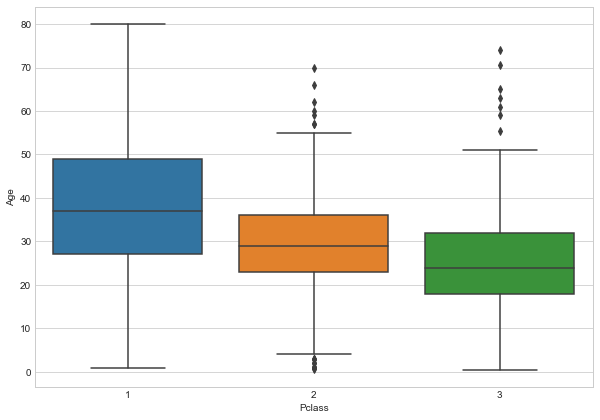

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y = 'Age', data = train)
#passengers in class 1 and 2 seems to be a little bit older than 3

In [15]:
#going to take the average per pclass to fill in the missing age values

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

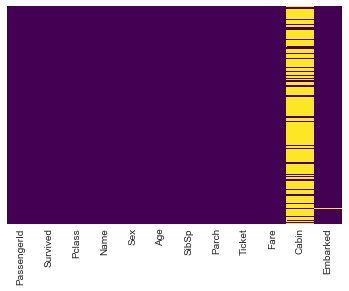

In [18]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
train.drop('Cabin', axis=1, inplace=True)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
train.dropna(inplace=True)

In [22]:
#creating a dummy variable for changing sex to a number value

In [23]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
#drop_first = True drops the first column so that you don't get a male and female column

In [24]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [25]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [26]:
train = pd.concat([train,sex,embark],axis=1)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [28]:
#need to drop the columns that aren't helpful to our ML algorithm
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [29]:
train.drop('PassengerId',axis=1,inplace=True)

In [30]:
#write to a new csv
train.to_csv('../titanic/cleaned_train.csv', index = False)

In [31]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [32]:
#treating the train dataset as our full dataset

In [33]:
X = train.drop('Survived',axis = 1)
y = train['Survived']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()

In [38]:
logmodel.fit(X_train,y_train)

C:\Users\toyao_000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
predictions = logmodel.predict(X_test) 

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,predictions, target_names = ["Did Not Survive", "Survived"]))

                 precision    recall  f1-score   support

Did Not Survive       0.85      0.91      0.88        57
       Survived       0.82      0.72      0.77        32

       accuracy                           0.84        89
      macro avg       0.84      0.82      0.82        89
   weighted avg       0.84      0.84      0.84        89



In [42]:
from sklearn.metrics import confusion_matrix

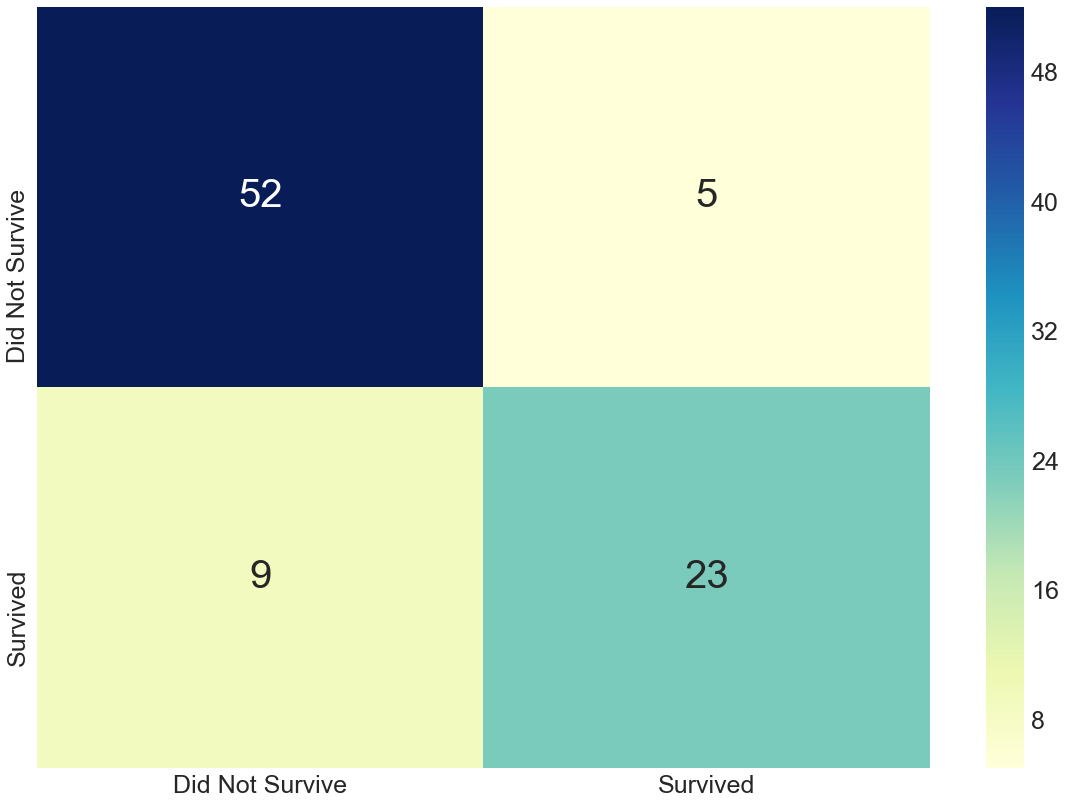

In [43]:
cm = confusion_matrix(y_test,predictions)
cm_df = pd.DataFrame(cm, index = ["Did Not Survive", "Survived"], 
                     columns = ["Did Not Survive", "Survived"])
plt.figure(figsize = (20,14))
sns.set(font_scale = 2.5)
sns.heatmap(cm_df, annot=True, annot_kws = {"size":40}, cmap="YlGnBu")

plt.show()


In [44]:
test = pd.read_csv("../titanic/cleaned_test.csv")
test_features = test[["Pclass", "Age", "SibSp", "Parch", "Fare", "male", "Q", "S"]]
test_predictions = logmodel.predict(test_features)
test_pred_df = pd.DataFrame(data = test_predictions, columns = ["Survived"])
id_cols = test[["PassengerId"]]

submission = pd.concat([id_cols, test_pred_df], axis = 1)
submission.astype("int32")
submission.to_csv("../submissions/LR_submission.csv", index = False)
